## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [1]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

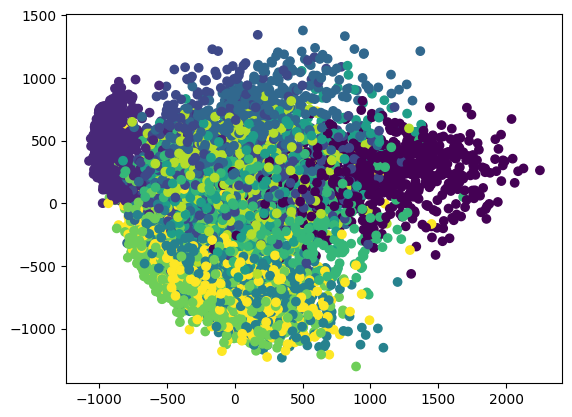

In [2]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()


#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

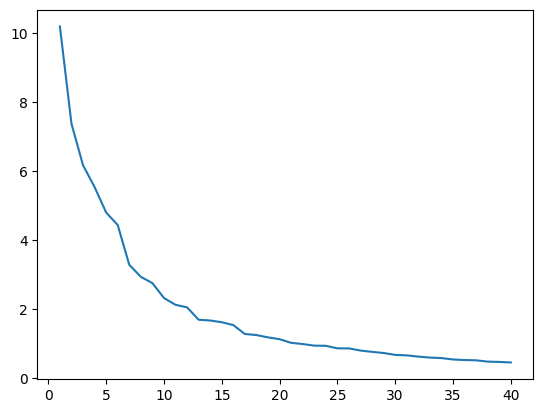

In [7]:
pca_high_dim = PCA()
pca_high_dim.fit_transform(X)

variance_explained = pca_high_dim.explained_variance_ratio_[:40] * 100
plt.plot(range(1, len(variance_explained) + 1), variance_explained)


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [11]:
cumulative_variance_explained = np.cumsum(pca_high_dim.explained_variance_ratio_)

# Find the number of components for desired explained variance
threshold = 0.95  # 95% variance
n_components = np.argmax(cumulative_variance_explained >= threshold) + 1
print(f"Number of components needed for {threshold*100}% variance: {n_components}")

Number of components needed for 95.0% variance: 149


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

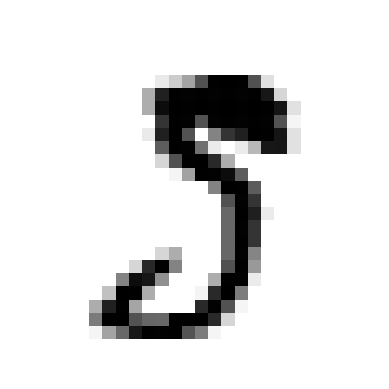

In [5]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

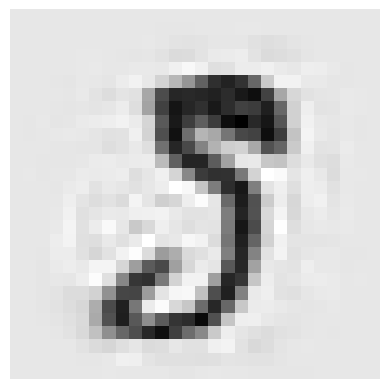

In [6]:
pca_reduced = PCA(n_components=n_components)
pca_reduced.fit_transform(X_mnist_train)

digit_reduced = pca_reduced.transform(X_mnist_train[0].reshape(1, -1))
digit_reconstructed = pca_reduced.inverse_transform(digit_reduced)

plot_mnist_digit(digit_reconstructed[0])

### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

threshold = 0.80
cumulative_variance = np.cumsum(pca_high_dim.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= threshold) + 1
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_mnist_train)
X_test_pca = pca.transform(X_mnist_test)

knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_mnist_train)
y_pred_pca = knn.predict(X_test_pca)
print(f"PCA Data Accuracy: {accuracy_score(y_mnist_test, y_pred_pca)}")

Original Data Accuracy: 0.9421428571428572
42
Original Data Accuracy: 0.95


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

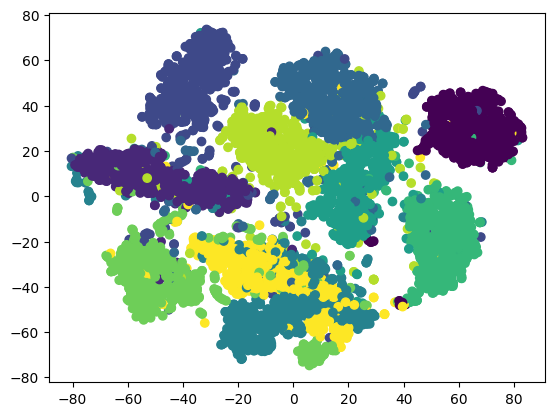

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(X)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=y)

2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [15]:
knn = KNeighborsClassifier()
X_tsne_train, X_tsne_test, y_tsne_train, y_tsne_test = train_test_split(x_tsne, y, test_size=0.2, random_state=42)
knn.fit(X_tsne_train, y_tsne_train)
pred = knn.predict(X_tsne_test)
print(f"tsne Accuracy: {accuracy_score(y_tsne_test, pred)}")

tsne Accuracy: 0.9392857142857143


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [16]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 44.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 48.3 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [umap-learn]5 [umap-learn]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install

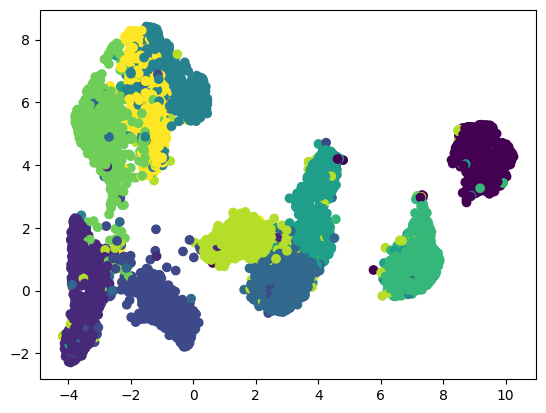

In [17]:
from umap import UMAP
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y)

Now, calculate accuracy with KNN.

In [ ]:
knn = KNeighborsClassifier()
X_umap_train, X_umap_test, y_umap_train, y_umap_test = train_test_split(X_umap, y, test_size=0.2, random_state=42)
knn.fit(X_umap_train, y_umap_train)
pred = knn.predict(X_umap_test)
print(f"umap Accuracy: {accuracy_score(y_umap_test, pred)}")

tsne Accuracy: 0.8971428571428571


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


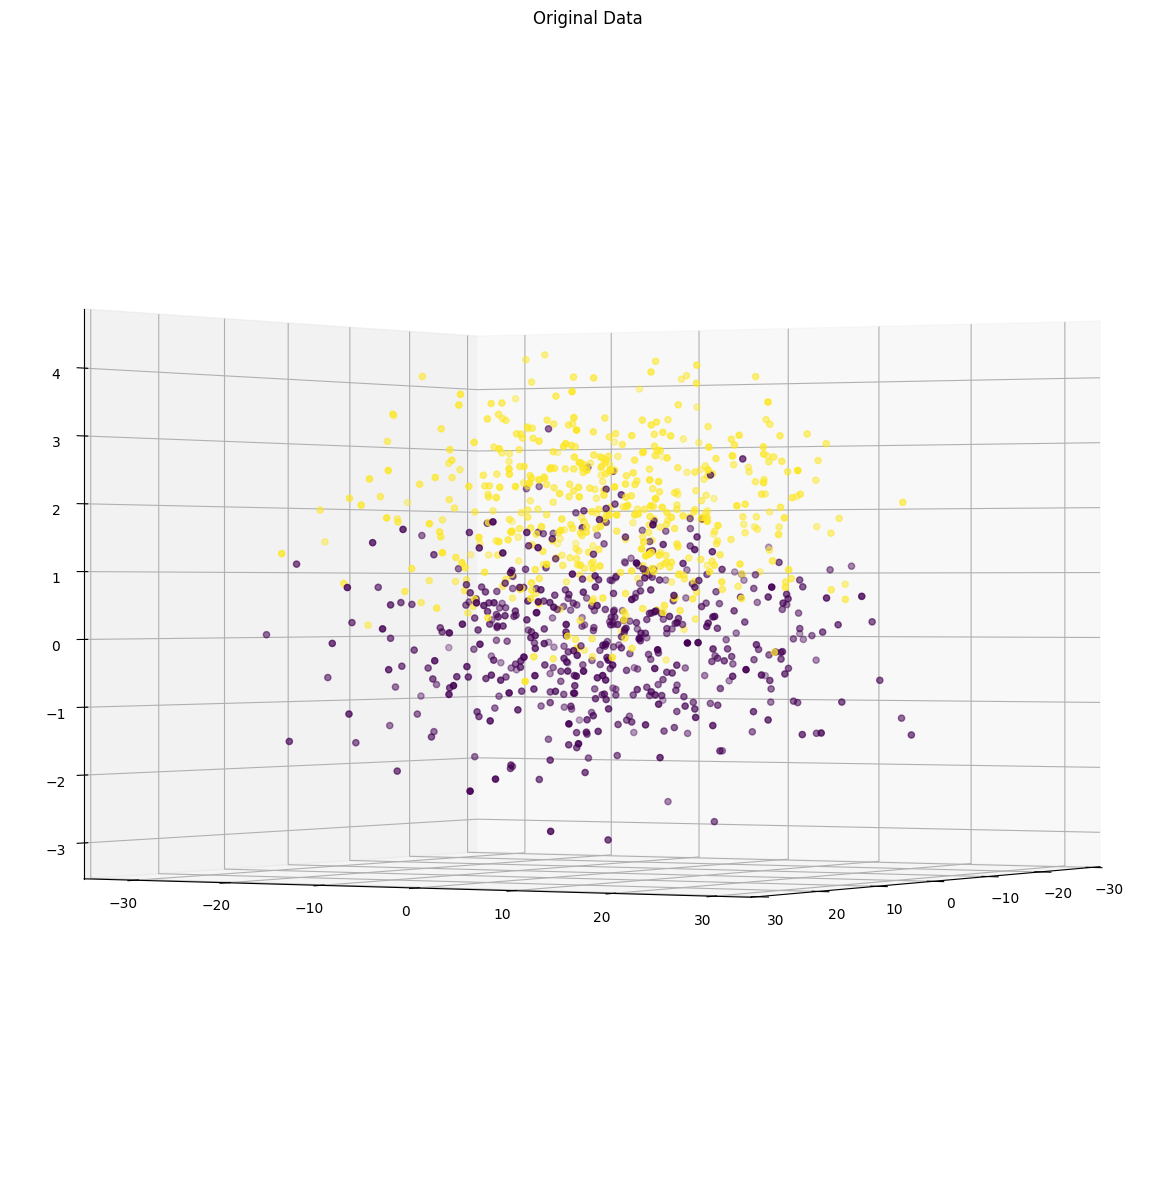

In [19]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [20]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [ ]:
pca = PCA(n_components=1)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_pca_train, y_train)
y_pca_pred = knn.predict(X_pca_test)
print(f"1 Component PCA Accuracy: {accuracy_score(y_test, y_pca_pred)}")

pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_pca_train, y_train)
y_pca_pred = knn.predict(X_pca_test)
print(f"2 Component PCA Accuracy: {accuracy_score(y_test, y_pca_pred)}")

pca = PCA(n_components=3)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.fit_transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_pca_train, y_train)
y_pca_pred = knn.predict(X_pca_test)
print(f"3 Component PCA Accuracy: {accuracy_score(y_test, y_pca_pred)}")

PCA Accuracy: 0.455
PCA Accuracy: 0.47
PCA Accuracy: 0.725


2. Try with UMAP.

In [39]:
umap = UMAP(n_components=1, min_dist=0.1)
X_umap_train = umap.fit_transform(X_train)
X_umap_test = umap.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_umap_train, y_train)
pred = knn.predict(X_umap_test)
print(f"1 component umap Accuracy: {accuracy_score(y_test, pred)}")

umap = UMAP(n_components=2, min_dist=0.1)
X_umap_train = umap.fit_transform(X_train)
X_umap_test = umap.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_umap_train, y_train)
pred = knn.predict(X_umap_test)
print(f"2 component umap Accuracy: {accuracy_score(y_test, pred)}")

umap = UMAP(n_components=3, min_dist=0.1)
X_umap_train = umap.fit_transform(X_train)
X_umap_test = umap.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_umap_train, y_train)
pred = knn.predict(X_umap_test)
print(f"3 component umap Accuracy: {accuracy_score(y_test, pred)}")

1 component umap Accuracy: 0.475
2 component umap Accuracy: 0.545
3 component umap Accuracy: 0.545


Explain your results in the cell below.  Which works better?  Why?

The PCA approach works the best here, with accuracy of 72.5% with 3 components. The reason that PCA outperforms UMAP in this case is because the two classes in the data are distributed the same across the x and y axes, but differently across the z axis; because of this PCA is able to perform well since it excels at finding these linear separations.